# Pre-Processing

In [1]:
from utils.dataloader import *
from utils.sift import *
from utils.helper import strech_img, plot_img_and_hist
from utils.classifier import grid_search
import pandas as pd
from matplotlib import pyplot as plt
import cv2 as cv
from sklearn.model_selection import train_test_split
import pickle

In [2]:
RANDOM_STATE = 66
ROOT_PATH, DATA_PATH, OUT_PATH = get_paths()
print(ROOT_PATH)

/Users/moooooo16/Documents/Computer Vision/Project/elpv


In [3]:
img_path, prob, types, labels= load_data(DATA_PATH)


## 0-3: mono, 4-7 poly
## 0, 4: 0.0, 
# 1,5: 0.333, 
# 2,6: 0.667, 
# 3,7: 1.0



print(len(img_path), 
      len(prob),
      len(types),
      len(labels))

[0 1 2 3 4 5 6 7] [588 117  56 313 920 178  50 402]
2624 2624 2624 2624


In [11]:
sift = SIFT(DATA_PATH, img_path, processing_funcs=[])
kps, descriptor, empty_descriptor = sift.calculate_desriptor(mask=None)
print(empty_descriptor)

Calculating descriptors: 100%|██████████| 2624/2624 [00:20<00:00, 126.49it/s]

[1835, 1836, 1842, 1843, 1894, 1895, 1896, 1902, 1903, 2326, 2327, 2329, 2334, 2335]


7
7
7
7
7
7
7
7
7
7
7
7
7
7


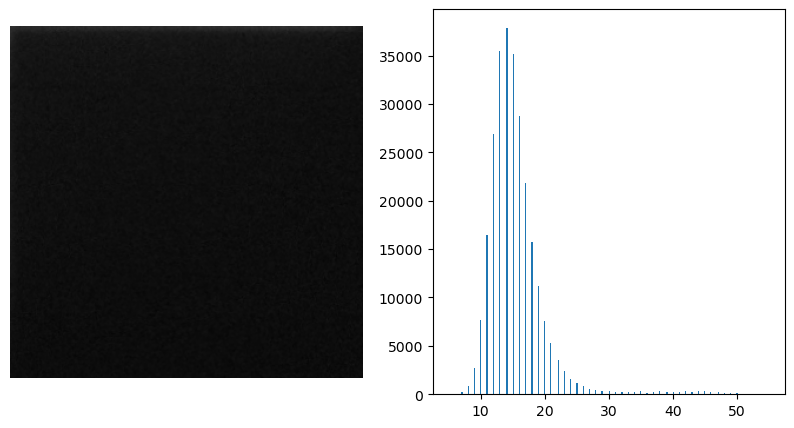

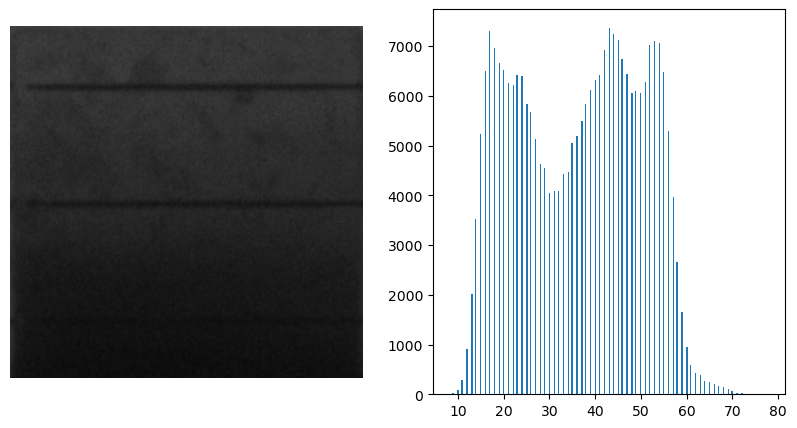

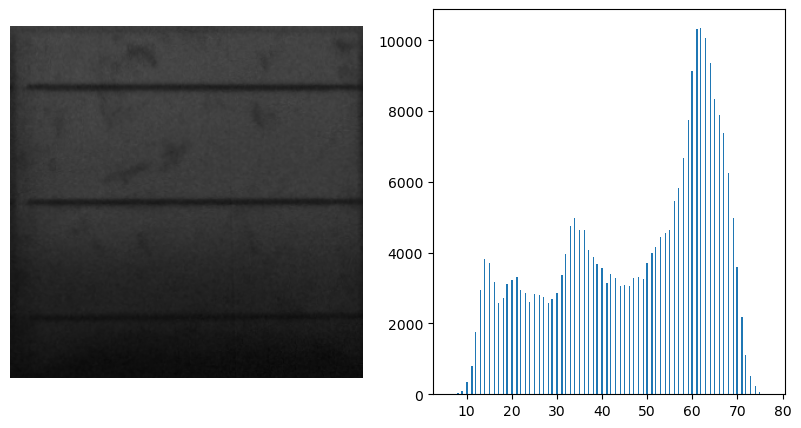

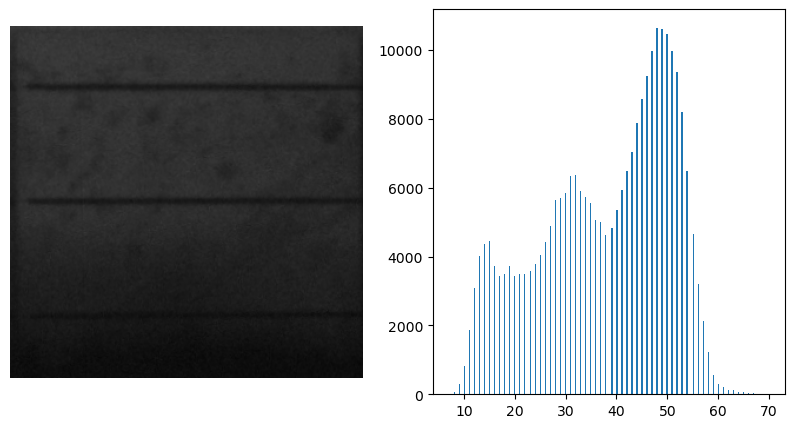

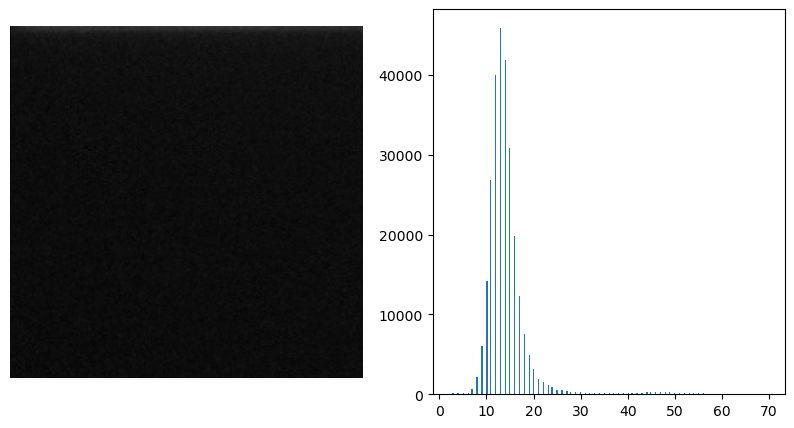

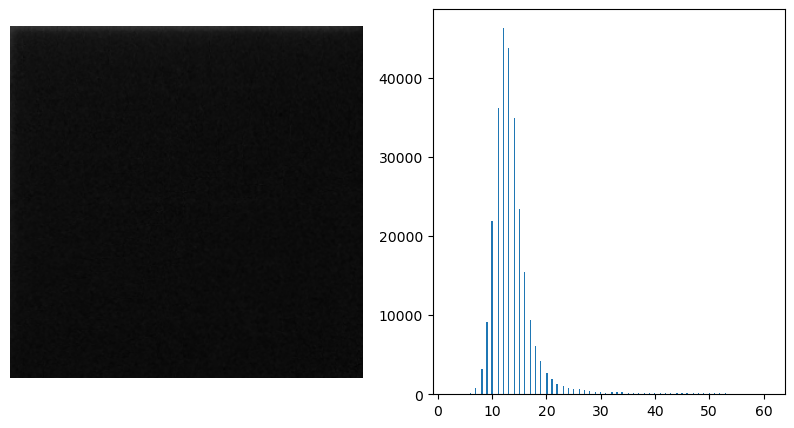

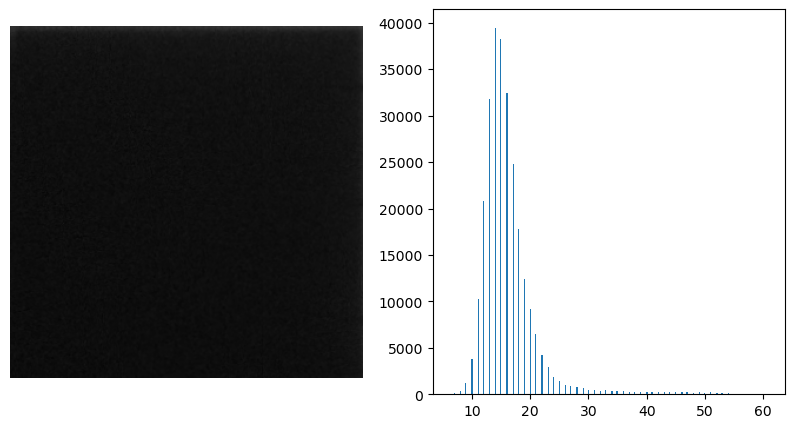

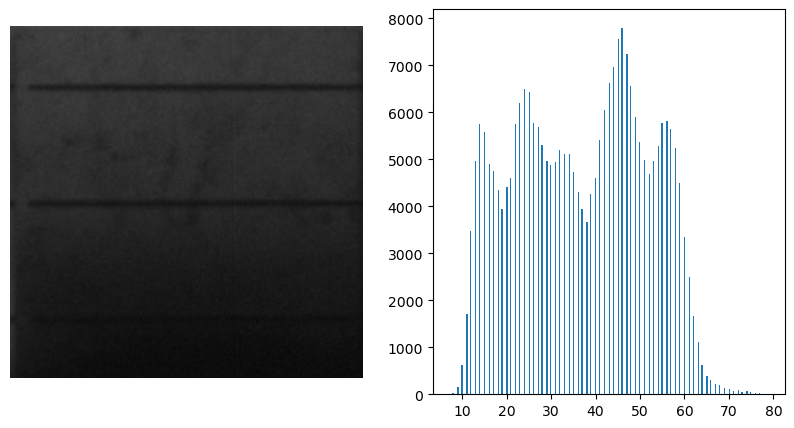

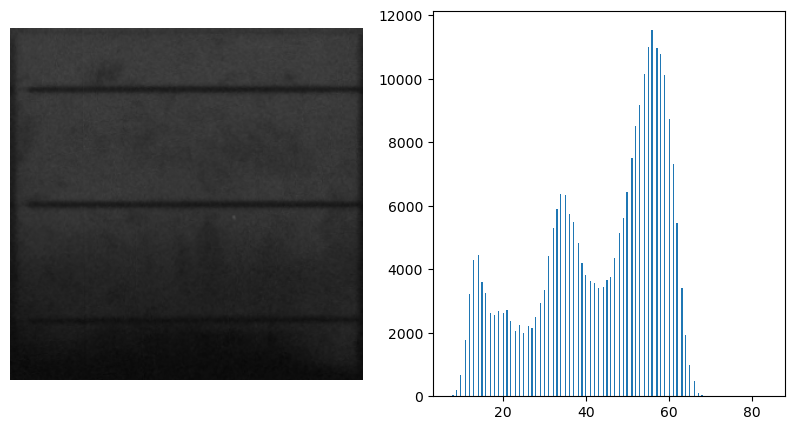

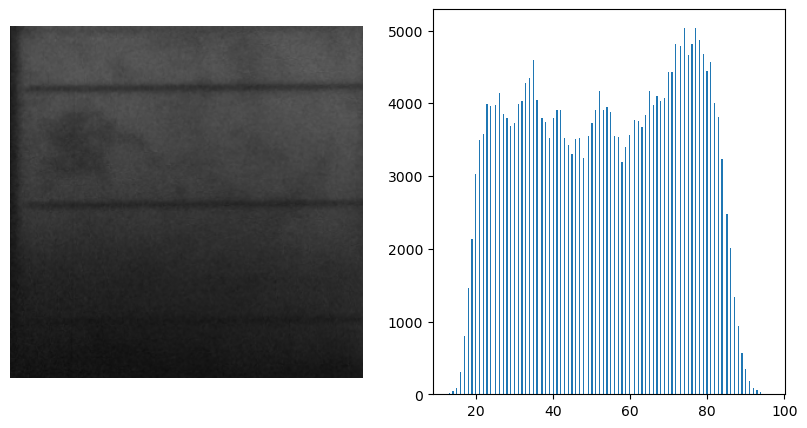

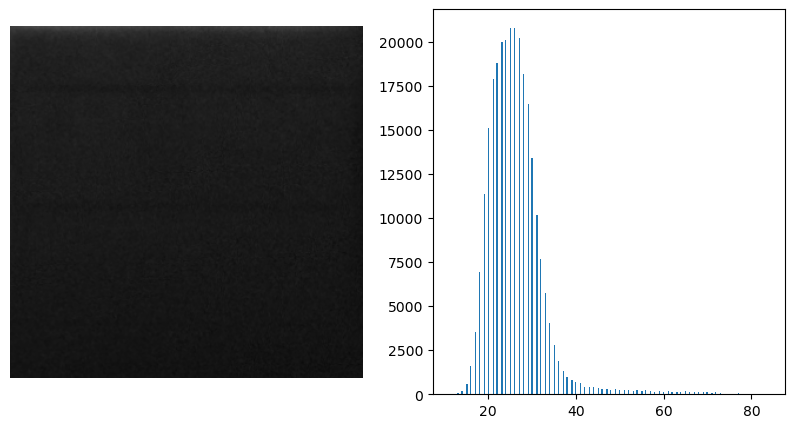

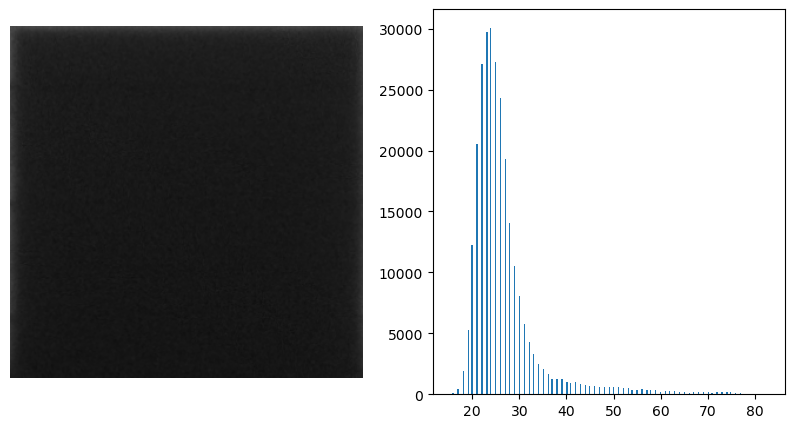

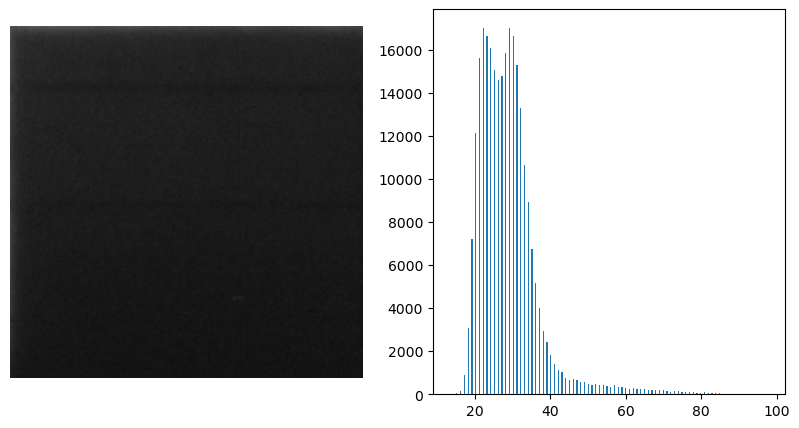

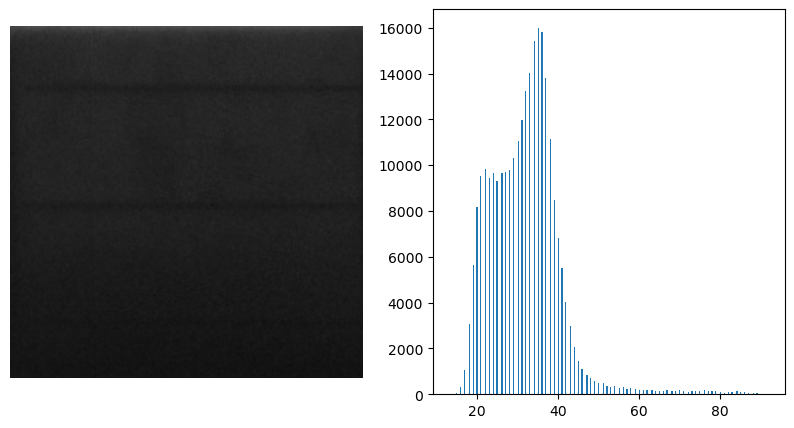

In [17]:
for path in empty_descriptor:
    img = cv.imread(os.path.join(DATA_PATH, img_path[path]))
    # img = strech_img(img)
    plot_img_and_hist(img)
    print(labels[path])

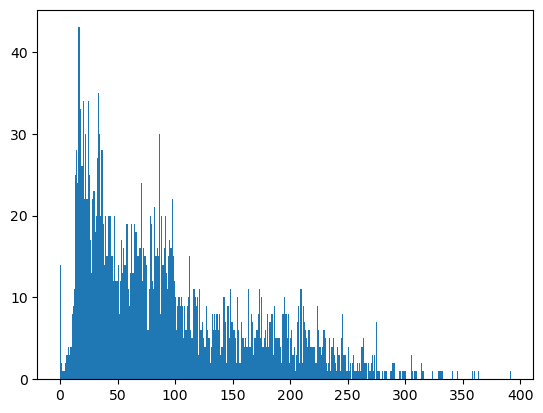

In [18]:
counts = [len(i) if i is not None else 0 for i in descriptor]

plt.hist(counts, bins = np.max(counts))
plt.show()

In [21]:
np.unique(counts, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [6]:
X_train, X_test, y_train, y_test = train_test_split(descriptor, labels, test_size=0.25, random_state=RANDOM_STATE, stratify= labels)


print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

1968 656
1968 656


In [7]:
ks = [64, 128, 256]

kmeans, features = sift.build_features(X_train, ks, 
                               state=RANDOM_STATE,
                               init = 'k-means++',
                               n_init=10,
                               max_iter=300,
                               tol=1e-4,)

Calculating kmeans for k = 64


Building histogram for k = 64: 100%|██████████| 1968/1968 [00:02<00:00, 774.53it/s]


Calculating kmeans for k = 128


Building histogram for k = 128: 100%|██████████| 1968/1968 [00:02<00:00, 750.38it/s]


Calculating kmeans for k = 256


Building histogram for k = 256: 100%|██████████| 1968/1968 [00:02<00:00, 687.77it/s]


In [8]:
test_hist = {}
for k in ks:
    hist = sift.get_features(X_test, kmeans[k], k)
    test_hist[k] = hist

Building histogram for k = {k}: 100%|██████████| 656/656 [00:00<00:00, 689.44it/s]


In [10]:
with open(os.path.join(OUT_PATH, 'sift_X.pkl'), 'wb') as f:
    pickle.dump((features, test_hist), f)
    
with open(os.path.join(OUT_PATH, 'sift_kmeans.pkl'), 'wb') as f:
    pickle.dump(kmeans, f)
    
with open(os.path.join(OUT_PATH, 'sift_y.pkl'), 'wb') as f:
    pickle.dump((y_train, y_test), f)